In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
merge_1 = pd.read_csv('multisub_5_partitions_unique.csv')

In [3]:
null_values = merge_1.isnull().sum()

In [4]:
null_values

Unnamed: 0               0
ACC                      0
Kingdom                  0
Partition                0
Membrane                 0
Cytoplasm                0
Nucleus                  0
Extracellular            0
Cell membrane            0
Mitochondrion            0
Plastid                  0
Endoplasmic reticulum    0
Lysosome/Vacuole         0
Golgi apparatus          0
Peroxisome               0
Sequence                 0
dtype: int64

In [5]:
merge_1.head()

,Unnamed: 0,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,0,Q28165,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,1,Q86U42,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,2,Q0GA42,Metazoa,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,3,P82349,Metazoa,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,4,Q7L5N1,Metazoa,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...


In [6]:
merge_2= pd.read_csv('deeploc_combined_data_with_partition.csv')

In [7]:
null_values_excluding_column = merge_2.drop(columns=['Kingdom']).isnull().sum()

In [8]:
null_values_excluding_column

ACC                      0
Sequence                 0
Membrane                 0
Cytoplasm                0
Nucleus                  0
Extracellular            0
Cell membrane            0
Mitochondrion            0
Plastid                  0
Endoplasmic reticulum    0
Lysosome/Vacuole         0
Golgi apparatus          0
Peroxisome               0
Partition                0
dtype: int64

In [9]:
# Concatenate row-wise
concatenated_df = pd.concat([merge_1, merge_2], axis=0)

In [10]:
# Reset the index
df_reset =concatenated_df.reset_index(drop=True)

In [11]:
df_reset

,Unnamed: 0,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,0.0,Q28165,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,1.0,Q86U42,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,2.0,Q0GA42,Metazoa,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,3.0,P82349,Metazoa,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,4.0,Q7L5N1,Metazoa,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,NaN,P82971,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...
28735,NaN,B4YSU8,NaN,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...
28736,NaN,B3A0P0,NaN,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI
28737,NaN,P86368,NaN,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...


In [12]:
null_values_excluding_column = df_reset.drop(columns=['Unnamed: 0','Kingdom']).isnull().sum()

In [13]:
null_values_excluding_column

ACC                      0
Partition                0
Membrane                 0
Cytoplasm                0
Nucleus                  0
Extracellular            0
Cell membrane            0
Mitochondrion            0
Plastid                  0
Endoplasmic reticulum    0
Lysosome/Vacuole         0
Golgi apparatus          0
Peroxisome               0
Sequence                 0
dtype: int64

In [14]:
df_reset.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
df_reset.rename(columns={'index':'Unnamed: 0'}, inplace=True)

In [16]:
df_reset.head()

,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,Q28165,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,Q86U42,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,Q0GA42,Metazoa,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,P82349,Metazoa,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,Q7L5N1,Metazoa,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...


In [17]:
null_values_excluding_column

ACC                      0
Partition                0
Membrane                 0
Cytoplasm                0
Nucleus                  0
Extracellular            0
Cell membrane            0
Mitochondrion            0
Plastid                  0
Endoplasmic reticulum    0
Lysosome/Vacuole         0
Golgi apparatus          0
Peroxisome               0
Sequence                 0
dtype: int64

In [18]:
len(merge_1)

28303

In [19]:
len(concatenated_df)

28739

In [20]:
df_reset.to_csv('multisub_5_partitions_unique_U.csv')

In [21]:
load= pd.read_csv('multisub_5_partitions_unique_U.csv')

In [22]:
load.head()

,Unnamed: 0,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,0,Q28165,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,1,Q86U42,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,2,Q0GA42,Metazoa,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,3,P82349,Metazoa,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,4,Q7L5N1,Metazoa,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...


In [23]:
null_values_excluding_column = load.drop(columns=['Kingdom']).isnull().sum()

In [24]:
null_values_excluding_column

Unnamed: 0               0
ACC                      0
Partition                0
Membrane                 0
Cytoplasm                0
Nucleus                  0
Extracellular            0
Cell membrane            0
Mitochondrion            0
Plastid                  0
Endoplasmic reticulum    0
Lysosome/Vacuole         0
Golgi apparatus          0
Peroxisome               0
Sequence                 0
dtype: int64

In [15]:
# Find the indices of null values
null_indices = load['Sequence'][load['Sequence'].isnull()].index
print("Indices of null values:")
print(null_indices)

Indices of null values:
Index([], dtype='int64')


In [2]:
df=pd.read_csv('multisub_5_partitions_unique.csv')

In [5]:
partition_counts = df['Partition'].value_counts()
partition_percentages = partition_counts 

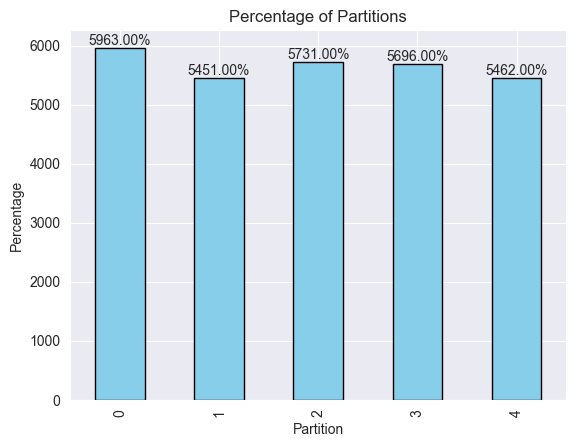

In [6]:
import matplotlib.pyplot as plt

# Plotting
partition_percentages.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Partition')
plt.ylabel('Percentage')
plt.title('Percentage of Partitions')
#plt.ylim(0, 100)  # Percentage ranges from 0 to 100
for i, percentage in enumerate(partition_percentages.sort_index()):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')
plt.show()